# Cellular Automata: Conway's Game of Life

For details and alternative rules see: https://scientific-python.readthedocs.io/en/latest/notebooks_rst/0_Python/10_Examples/GameOfLife.html

## Libraries and settings

In [1]:
# This exercise requires the 'ipympl' library

# Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation, rc, cm

%matplotlib widget

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/Users/ivesbrunner/Documents/Studium/01_Bachelor/04_Semester/04_ScientificProgramming/scientific_programming/Week_09/exercises


In [2]:
class LLCA:
    """
    A Life Like Cellular Automaton (LLCA)

    Inputs:
    * C: a binary matrix representing the cells where 1 stands for alive and 0 for dead.
    * rule: the rule of the in the format 'BXSY' where X and Y are the birth and survival conditions.
            Example: GOL rule is "B3S23".
    """
    def __init__(self, C = np.random.rand(50, 50), rule = "B3S23"):
        self.C = np.array(C).astype(bool)
        self.rule = rule

    def parse_rule(self):
        """
        Parses the rule string
        """
        r = self.rule.upper().split("S")
        B = np.array([int(i) for i in r[0][1:] ]).astype(np.int64)
        S = np.array([int(i) for i in r[1] ]).astype(np.int64)
        return B, S

    def neighbors(self):
        """
        Returns the number of living neigbors of each cell.
        """
        C = self.C
        N = np.zeros(C.shape, dtype = np.int8) # Neighbors matrix
        N[ :-1,  :  ]  += C[1:  , :  ] # Living cells south
        N[ :  ,  :-1]  += C[ :  ,1:  ] # Living cells east
        N[1:  ,  :  ]  += C[ :-1, :  ] # Living cells north
        N[ :  , 1:  ]  += C[ :  , :-1] # Living cells west
        N[ :-1,  :-1]  += C[1:  ,1:  ] # Living cells south east
        N[1:  ,  :-1]  += C[ :-1,1:  ] # Living cells north east
        N[1:  , 1:  ]  += C[ :-1, :-1] # Living cells north west
        N[ :-1, 1:  ]  += C[1:  , :-1] # Living cells south west
        return N

    def iterate(self):
        """
        Iterates one time.
        """
        B, S = self.parse_rule()
        N = self.neighbors()
        C = self.C
        C1 = np.zeros(C.shape, dtype = np.int8)
        for b in B: C1 += ((C == False) & (N == b))
        for s in S: C1 += (C & (N == s))
        self.C[:] = C1 > 0

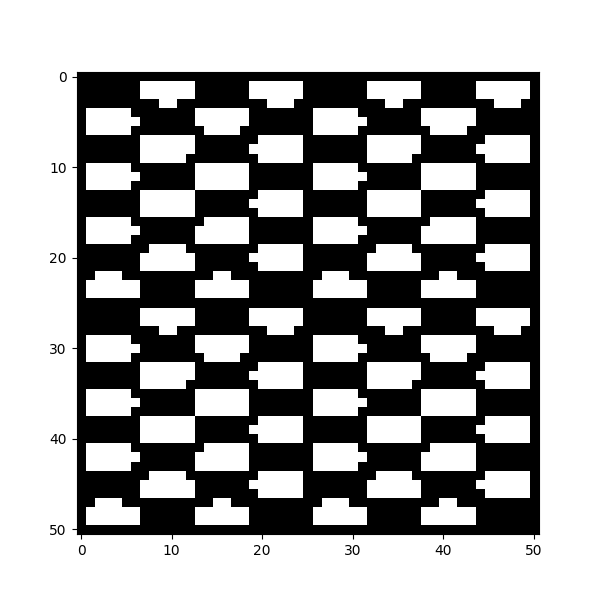

In [10]:
# Initial Configuration
N = 50
t = np.linspace(0., 1., N+1)
X, Y = np.meshgrid(t, t)
f = 4
C0 = np.sin(2. * np.pi * f * X ) * np.sin(2. * np.pi * 2 * f * Y )  > -.1

# Original rule (B2S23 means birth if 2 living neighbours and survival if 2 or 3 living neighbours)
g = LLCA(C0, rule = "B2S23")

# Alternative rules
# g = LLCA(C0, rule = "B2S125")
# g = LLCA(C0, rule = "B2S130")
# g = LLCA(C0, rule = "B1S1305")
# g = LLCA(C0, rule = "B3678S34678")
# g = LLCA(C0, rule = "B0123478S01234678") # black/white reversal

# Function to update the figure
def updatefig(*args):
    g.iterate()
    im.set_array(g.C)
    return im,

fig, ax = plt.subplots(figsize=(6,6))
ax.axis('on')
im = plt.imshow(g.C, interpolation = "nearest", cmap = cm.binary, animated=True)
anim = animation.FuncAnimation(fig, updatefig, frames=200, interval=50, blit=True)

# plt.show()

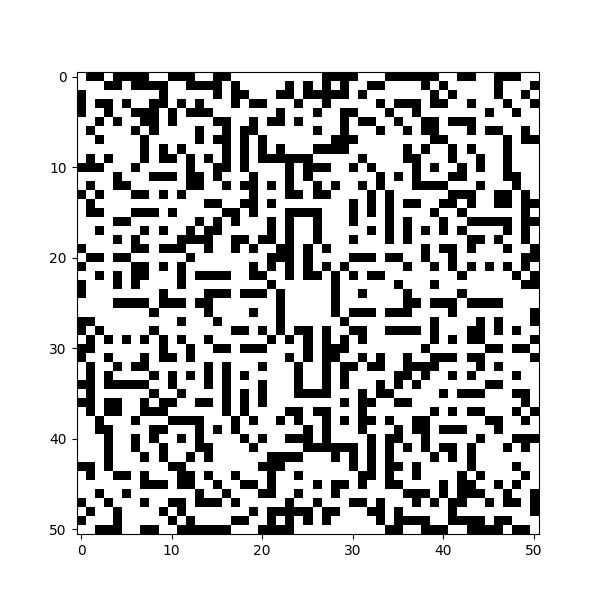

In [11]:
import numpy as np

# Run the simulation
N = 50
t = np.linspace(0., 1., N+1)
X, Y = np.meshgrid(t, t)
f = 4
C0 = np.sin(2. * np.pi * f * X ) * np.sin(2. * np.pi * 2 * f * Y ) > -.1
g = LLCA(C0, rule = "B2S23")

# Run defined number of iterations
for i in range(100):
    g.iterate()

# Plot graphic
fig, ax = plt.subplots(figsize=(6,6))
ax.axis('on')
im = plt.imshow(g.C, interpolation = "nearest", cmap = cm.binary)

# Export the numpy array
np.savetxt('game_of_life.txt', g.C, fmt='%d')

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [4]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 23.4.0
Datetime: 2024-04-18 11:40:56
Python Version: 3.10.13
-----------------------------------
